**CRIB SHEET RULES OF THE ROAD:**

This crib sheet is provided to support access, utilization, and plotting of UCalgary optical datasets. It is intended as a base set of code that a user may edit and manipulate to serve their own needs.  Crib sheets contains UCalgary verified and validated procedures for plotting and manipulating UCalgary ASI data for common use cases.  Use of this crib sheet does not require acknowledgment, it is freely distributed for scientific use. Please also remember to perform due diligence on all data use.  We recommend comparison with verified data products on [data.phys.ucalgary.ca](https://data.phys.ucalgary.ca) to ensure that any user output does not contradict operational summary plots.  Data use must be acknowledged according to the information available for each data set - please see [data.phys.ucalgary.ca](https://data.phys.ucalgary.ca).  If you encounter any issues with the data or the crib sheet, please contact the UCalgary team for support (Emma Spanswick, elspansw@ucalgary.ca). Copyright © University of Calgary.

---
# **Multiple Imagers on the Same Mosaic**
---

### **Datasets**
All data from UCalgary ground-based geospace remote sensinhg projects can be found at https://data.phys.ucalgary.ca. This crib sheet currently pertains to
- THEMIS ASI
- REGO
- TREx RGB
- TREx NIR
- NORSTAR NASCAM
- *TREx Blueline - Skymaps Coming Soon*
- *SMILE ASI - Coming Soon*
- *Rainbow ASI - Coming Soon*

</br>

### **Crib Sheet Summary**
The code and supporting documentation in this provides an example of mapping a collection of THEMIS, REGO and TREx RGB images onto a map.



</br>

---

</br>


## **Install dependencies**

Here we'll install [PyAuroraX](https://github.com/aurorax-space/pyaurorax), and import it.

Some helpful links:
  - [PyAuroraX documentation](https://docs.aurorax.space/code/overview)
  - [PyAuroraX API Reference](https://docs.aurorax.space/code/pyaurorax_api_reference/pyaurorax)
  - [Jupyter notebook examples](https://github.com/aurorax-space/pyaurorax/tree/main/examples/notebooks)

In [1]:
!pip install pyaurorax

In [1]:
import datetime
import pprint
import cartopy
import pyaurorax
from tqdm.auto import tqdm

aurorax = pyaurorax.PyAuroraX()
at = aurorax.tools

## **Downloading and Reading Data**

We need to download the data we're going to be using. PyAuroraX provides functions to handle this for you. You can learn more about how to use them by looking at the 'Data download` crib sheet, reading the PyAuroraX documentation, or the PyAuroraX API reference. Links are above.

If you prefer our other methods to download the data (basic HTTP, FTP, Rsync), that is also possible. You would download the data and skip to the data reading step of this crib sheet.

In [7]:
# set up site uid lists
rgb_site_uid_list = ["atha", "gill", "luck", "rabb", "yknf"]
themis_site_uid_list = ["fsmi"]
rego_site_uid_list = ["rank"]

# download 1 minute of TREx RGB data from several sites
dataset_name = "TREX_RGB_RAW_NOMINAL"
start_dt = datetime.datetime(2023, 2, 24, 6, 15)
end_dt = datetime.datetime(2023, 2, 24, 6, 15)
r_rgb_raw = {}
for site_uid in tqdm(rgb_site_uid_list, desc="Downloading RGB raw data", unit="site"):
    r_rgb_raw[site_uid] = aurorax.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid=site_uid, progress_bar_disable=True)

# download 1 minute of THEMIS data from several sites
dataset_name = "THEMIS_ASI_RAW"
start_dt = datetime.datetime(2023, 2, 24, 6, 15)
end_dt = datetime.datetime(2023, 2, 24, 6, 15)
r_themis_raw = {}
for site_uid in tqdm(themis_site_uid_list, desc="Downloading THEMIS raw data", unit="site"):
    r_themis_raw[site_uid] = aurorax.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid=site_uid, progress_bar_disable=True)

# download 1 minute of REGO data from one sites
dataset_name = "REGO_RAW"
start_dt = datetime.datetime(2023, 2, 24, 6, 15)
end_dt = datetime.datetime(2023, 2, 24, 6, 15)
r_rego_raw = {}
for site_uid in tqdm(rego_site_uid_list, desc="Downloading REGO raw data", unit="site"):
    r_rego_raw[site_uid] = aurorax.data.ucalgary.download(dataset_name, start_dt, end_dt, site_uid=site_uid, progress_bar_disable=True)

In [8]:
# Read in the data site-by-site, as we need this separation for mosaicing
#
# initialize our total data list
data_list = []

# read in each site of data for TREx RGB
for site_uid, download_obj in r_rgb_raw.items():
    data_list.append(aurorax.data.ucalgary.read(download_obj.dataset, download_obj.filenames))

# read in each site of data for THEMIS
for site_uid, download_obj in r_themis_raw.items():
    data_list.append(aurorax.data.ucalgary.read(download_obj.dataset, download_obj.filenames))

# read in each site of data for REGO
for site_uid, download_obj in r_rego_raw.items():
    data_list.append(aurorax.data.ucalgary.read(download_obj.dataset, download_obj.filenames))

In [9]:
# Initialize our total skymap data list
skymaps = []

# Get the recommended skymap for RGB data, read it in
for site_uid in rgb_site_uid_list:
    download_obj = aurorax.data.ucalgary.download_best_skymap("TREX_RGB_SKYMAP_IDLSAV", site_uid, start_dt)
    skymap = aurorax.data.ucalgary.read(download_obj.dataset, download_obj.filenames[0])
    skymaps.append(skymap.data[0])

# Get the recommended skymap for THEMIS data, read it in
for site_uid in themis_site_uid_list:
    download_obj = aurorax.data.ucalgary.download_best_skymap("THEMIS_ASI_SKYMAP_IDLSAV", site_uid, start_dt)
    skymap = aurorax.data.ucalgary.read(download_obj.dataset, download_obj.filenames[0])
    skymaps.append(skymap.data[0])

# Get the recommended skymap for REGO data, read it in
for site_uid in rego_site_uid_list:
    download_obj = aurorax.data.ucalgary.download_best_skymap("REGO_SKYMAP_IDLSAV", site_uid, start_dt)
    skymap = aurorax.data.ucalgary.read(download_obj.dataset, download_obj.filenames[0])
    skymaps.append(skymap.data[0])

skymaps

[Skymap(project_uid=rgb, site_uid=atha, imager_uid=rgb-07, site_map_latitude=54.602631, site_map_longitude=246.355728, ...),
 Skymap(project_uid=rgb, site_uid=gill, imager_uid=rgb-04, site_map_latitude=56.376724, site_map_longitude=265.356323, ...),
 Skymap(project_uid=rgb, site_uid=luck, imager_uid=rgb-03, site_map_latitude=51.153988, site_map_longitude=252.735260, ...),
 Skymap(project_uid=rgb, site_uid=rabb, imager_uid=rgb-06, site_map_latitude=58.227810, site_map_longitude=256.319366, ...),
 Skymap(project_uid=rgb, site_uid=yknf, imager_uid=rgb-08, site_map_latitude=62.519848, site_map_longitude=245.686966, ...),
 Skymap(project_uid=themis, site_uid=fsmi, imager_uid=themis10, site_map_latitude=60.026112, site_map_longitude=248.067062, ...),
 Skymap(project_uid=rego, site_uid=rank, imager_uid=rego-649, site_map_latitude=62.824673, site_map_longitude=267.885223, ...)]

## **Creating a Multi-Imager Mosaic**

In [10]:
# prepare the skymap data
prepped_skymap = at.mosaic.prep_skymaps(skymaps, 110, n_parallel=5)
prepped_skymap

Preparing skymaps:   0%|          | 0/7 [00:00<?, ?skymap/s]

MosaicSkymap(polyfill_lat=array(dims=(5, 265440),(5, 65536),(5, 262144), dtype=float64), polyfill_lon=array(dims=(5, 265440),(5, 65536),(5, 262144), dtype=float64), elevation=array(dims=(265440,),(65536,),(262144,), dtype=float32), site_uid_list=['atha', 'gill', 'luck', 'rabb', 'yknf', 'fsmi', 'rank'])

In [11]:
# prepare the image data
prepped_images = at.mosaic.prep_images(data_list)
prepped_images

MosaicData(images=Dict[7 sites of array(dims=(480, 553),(256, 256),(512, 512))], timestamps=[20 timestamps], site_uid_list=['atha', 'gill', 'luck', 'rabb', 'yknf', 'fsmi', 'rank'])

In [13]:
# define the intensity scales for each site
scale = {
    "atha": [10, 105],
    "gill": [10, 105],
    "luck": [10, 105],
    "rabb": [10, 105],
    "yknf": [10, 105],
    "fsmi": [3500, 14000],
    "rank": [400, 1100],
}

# create projection
center_lat = -100.0
center_lon = 55.0
projection_obj = cartopy.crs.NearsidePerspective(central_longitude=center_lat, central_latitude=center_lon)

# create mosaic
frame_num = 0
mosaic = at.mosaic.create(prepped_images, prepped_skymap, frame_num, projection_obj, image_intensity_scales=scale)
print(mosaic)

Mosaic(polygon_data=PolyCollection(...), cartopy_projection=Projection(+proj=nsper +a=6378137.0 +lon_0=-100.0 +lat_0=55.0 +h=35785831 +x_0=0 +y_0=0 +units=m +no_defs +type=crs))


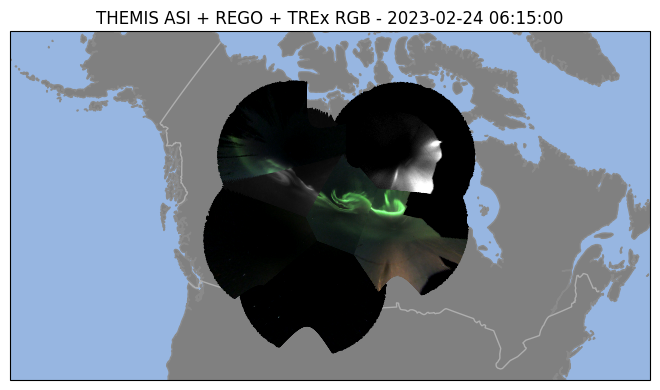

In [14]:
# plot mosaic
map_extent = [-145, -65, 35, 70]
mosaic.plot(map_extent, title="THEMIS ASI + REGO + TREx RGB - %s" % (data_list[0].timestamp[0].strftime("%Y-%m-%d %H:%M:%S")))

**Note**

In practice, it is not really useful to mask between REGO and THEMIS/RGB - due to REGO's narrow band nature, the imagers are not looking at the same thing - but it is just done here as an example.